# Teams

## Shooting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress, pearsonr
import plotly.express as px


In [3]:
shooting = pd.read_csv('team/shooting_premier_league_stats.csv')

In [4]:
shooting

,Unnamed: 0,Squad,Position,Gls#,Sh#,SoT#,xG#,Gls,Sh,SoT,...,Sh/90,SoT/90,G/Sh,G/SoT,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,1,Arsenal,2,2,5,5,5,84,589,194,...,15.50,5.11,0.14,0.42,3,71.9,69.1,0.12,12.1,11.9
1,2,Aston Villa,7,10,11,10,10,49,427,145,...,11.24,3.82,0.11,0.32,3,50.2,47.2,0.11,-1.2,-1.2
2,3,Bournemouth,15,15,20,18,18,37,358,126,...,9.42,3.32,0.10,0.29,0,38.6,38.6,0.11,-1.6,-1.6
3,4,Brentford,9,7,18,9,8,56,400,147,...,10.53,3.87,0.12,0.33,7,56.8,50.6,0.13,-0.8,-1.6
4,5,Brighton,6,4,1,1,2,68,607,219,...,15.97,5.76,0.10,0.28,6,73.3,68.9,0.12,-5.3,-6.9
5,6,Chelsea,12,16,8,8,11,37,481,151,...,12.66,3.97,0.07,0.23,3,49.5,47.2,0.10,-12.5,-13.2
6,7,Crystal Palace,11,14,13,16,17,38,423,133,...,11.13,3.50,0.09,0.28,1,39.3,36.8,0.09,-1.3,0.2
7,8,Everton,17,19,12,11,15,32,426,143,...,11.21,3.76,0.07,0.20,3,45.2,42.8,0.10,-13.2,-13.8
8,9,Fulham,10,9,14,14,14,52,420,137,...,11.05,3.61,0.11,0.34,5,46.2,39.1,0.10,5.8,7.9
9,10,Leeds United,19,12,10,13,13,45,459,141,...,12.08,3.71,0.10,0.31,1,47.4,45.0,0.10,-2.4,-1.0


In [5]:
shooting.describe().round(2)

,Unnamed: 0,Position,Gls#,Sh#,SoT#,xG#,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,10.50,10.50,10.50,10.50,10.50,10.50,51.95,475.50,157.85,33.09,12.51,4.15,0.10,0.30,3.70,54.00,50.20,0.11,-2.05,-1.95
std,5.92,5.92,5.92,5.92,5.92,5.92,17.76,85.00,33.44,2.33,2.24,0.88,0.02,0.06,2.25,13.87,13.34,0.01,7.71,7.98
min,1.00,1.00,1.00,1.00,1.00,1.00,28.00,358.00,111.00,28.50,9.42,2.92,0.06,0.20,0.00,36.80,34.50,0.09,-13.20,-13.80
25%,5.75,5.75,5.75,5.75,5.75,5.75,37.00,412.75,133.00,31.40,10.86,3.50,0.09,0.26,2.75,43.72,38.98,0.10,-8.05,-8.88
50%,10.50,10.50,10.50,10.50,10.50,10.50,49.00,443.00,144.00,33.25,11.66,3.79,0.10,0.30,3.00,49.85,46.50,0.11,-1.65,-1.40
75%,15.25,15.25,15.25,15.25,15.25,15.25,65.00,571.00,188.00,34.75,15.03,4.94,0.11,0.33,5.25,68.75,65.82,0.12,-1.10,0.20
max,20.00,20.00,20.00,20.00,20.00,20.00,92.00,607.00,219.00,36.80,15.97,5.76,0.14,0.42,9.00,78.60,71.10,0.13,13.40,11.90


In [6]:
shooting = shooting.drop(columns=['Unnamed: 0'])
shooting.set_index(np.arange(1, len(shooting)+1))


,Squad,Position,Gls#,Sh#,SoT#,xG#,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
1,Arsenal,2,2,5,5,5,84,589,194,32.9,15.50,5.11,0.14,0.42,3,71.9,69.1,0.12,12.1,11.9
2,Aston Villa,7,10,11,10,10,49,427,145,34.0,11.24,3.82,0.11,0.32,3,50.2,47.2,0.11,-1.2,-1.2
3,Bournemouth,15,15,20,18,18,37,358,126,35.2,9.42,3.32,0.10,0.29,0,38.6,38.6,0.11,-1.6,-1.6
4,Brentford,9,7,18,9,8,56,400,147,36.8,10.53,3.87,0.12,0.33,7,56.8,50.6,0.13,-0.8,-1.6
5,Brighton,6,4,1,1,2,68,607,219,36.1,15.97,5.76,0.10,0.28,6,73.3,68.9,0.12,-5.3,-6.9
6,Chelsea,12,16,8,8,11,37,481,151,31.4,12.66,3.97,0.07,0.23,3,49.5,47.2,0.10,-12.5,-13.2
7,Crystal Palace,11,14,13,16,17,38,423,133,31.4,11.13,3.50,0.09,0.28,1,39.3,36.8,0.09,-1.3,0.2
8,Everton,17,19,12,11,15,32,426,143,33.6,11.21,3.76,0.07,0.20,3,45.2,42.8,0.10,-13.2,-13.8
9,Fulham,10,9,14,14,14,52,420,137,32.6,11.05,3.61,0.11,0.34,5,46.2,39.1,0.10,5.8,7.9
10,Leeds United,19,12,10,13,13,45,459,141,30.7,12.08,3.71,0.10,0.31,1,47.4,45.0,0.10,-2.4,-1.0


### Shots

In [7]:
shooting_sorted = shooting.sort_values('Sh', ascending=False).head(5).reset_index(drop=True)
shooting_sorted.index = shooting_sorted.index + 1
shooting_sorted[['Squad', 'Sh']] 


,Squad,Sh
1,Brighton,607
2,Liverpool,601
3,Manchester City,590
4,Manchester Utd,590
5,Arsenal,589


Brighton created the most shots in the Premier League last season.

### Shots on Target

In [8]:
SoT_sorted = shooting.sort_values('SoT', ascending=False).head(5).reset_index(drop=True)
SoT_sorted.index = SoT_sorted.index + 1
SoT_sorted[['Squad', 'SoT']]

,Squad,SoT
1,Brighton,219
2,Manchester Utd,206
3,Manchester City,205
4,Liverpool,203
5,Arsenal,194


Brighton also had the most shots on target last season.

### Expected Goals(xG)

In [9]:
shooting_xGsorted = shooting.sort_values('xG', ascending=False).set_index(np.arange(1, len(shooting)+1))
shooting_xGsorted[['Squad', 'xG']].head(5)

,Squad,xG
1,Manchester City,78.6
2,Brighton,73.3
3,Liverpool,72.6
4,Newcastle Utd,72.0
5,Arsenal,71.9


### Goals

In [10]:
top_5_gls = shooting.sort_values('Gls', ascending=False).head(5).reset_index(drop=True)
top_5_gls.index = top_5_gls.index + 1
top_5_gls[['Squad', 'Gls']]



,Squad,Gls
1,Manchester City,92
2,Arsenal,84
3,Liverpool,71
4,Tottenham,68
5,Brighton,68


### Overperformed xG

In [11]:
overperformed_xG = shooting[shooting['Gls'] > shooting['xG']].sort_values('Gls', ascending=False).reset_index(drop=True)
overperformed_xG.index = overperformed_xG.index + 1
overperformed_xG[['Squad', 'Gls', 'xG']]


,Squad,Gls,xG
1,Manchester City,92,78.6
2,Arsenal,84,71.9
3,Tottenham,68,57.1
4,Fulham,52,46.2


### Underperformed xG

In [12]:
underperformed_xG = shooting[shooting['Gls'] < shooting['xG']].sort_values('Gls', ascending=False).reset_index(drop=True)
underperformed_xG.index = underperformed_xG.index + 1
underperformed_xG[['Squad', 'Gls', 'xG']]

,Squad,Gls,xG
1,Liverpool,71,72.6
2,Brighton,68,73.3
3,Newcastle Utd,64,72.0
4,Brentford,56,56.8
5,Manchester Utd,56,67.7
6,Aston Villa,49,50.2
7,Leicester City,49,50.6
8,Leeds United,45,47.4
9,West Ham,41,49.2
10,Crystal Palace,38,39.3


### Goals per Shots on Target

In [13]:
goals_SoT_5 = shooting.sort_values('G/SoT', ascending=False).head(5).reset_index(drop=True)
goals_SoT_5.index = goals_SoT_5.index + 1
goals_SoT_5[['Squad', 'G/SoT', 'Gls']]

,Squad,G/SoT,Gls
1,Arsenal,0.42,84
2,Manchester City,0.40,92
3,Fulham,0.34,52
4,Tottenham,0.34,68
5,Liverpool,0.34,71


In [14]:
goals_SoT = shooting.sort_values('G/SoT', ascending=False).reset_index(drop=True)
goals_SoT.index = goals_SoT.index + 1
goals_SoT[['Squad', 'G/SoT', 'Gls']]

,Squad,G/SoT,Gls
1,Arsenal,0.42,84
2,Manchester City,0.40,92
3,Fulham,0.34,52
4,Tottenham,0.34,68
5,Liverpool,0.34,71
6,Brentford,0.33,56
7,Newcastle Utd,0.32,64
8,Aston Villa,0.32,49
9,Leicester City,0.32,49
10,Leeds United,0.31,45


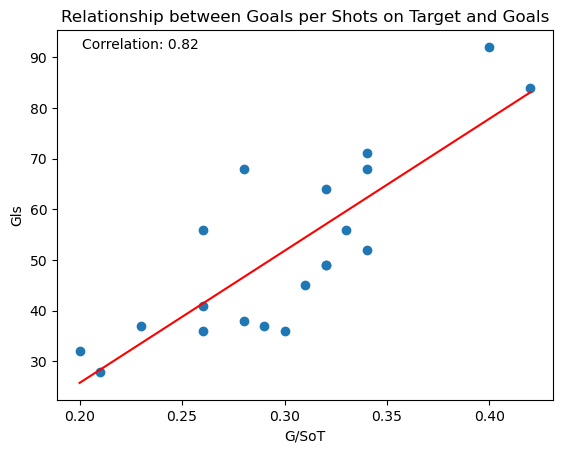

In [15]:
# Calculate line of best fit
slope, intercept, r_value, p_value, std_err = linregress(goals_SoT['G/SoT'], goals_SoT['Gls'])
line = slope * goals_SoT['G/SoT'] + intercept

# Plot scatter plot with line of best fit
plt.scatter(goals_SoT['G/SoT'], goals_SoT['Gls'],)
plt.plot(goals_SoT['G/SoT'], line, color='red', label='Line of Best Fit')

# Add labels and title
plt.xlabel('G/SoT')
plt.ylabel('Gls')
plt.title('Relationship between Goals per Shots on Target and Goals')

# Calculate Pearson correlation coefficient
correlation, _ = pearsonr(goals_SoT['G/SoT'], goals_SoT['Gls'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()


### Goals per Shots

In [16]:
goals_Shot_5 = shooting.sort_values('G/Sh', ascending=False).head(5).reset_index(drop=True)
goals_Shot_5.index = goals_Shot_5.index + 1
goals_Shot_5[['Squad', 'G/Sh', 'Gls']]

,Squad,G/Sh,Gls
1,Arsenal,0.14,84
2,Manchester City,0.14,92
3,Tottenham,0.12,68
4,Brentford,0.12,56
5,Fulham,0.11,52


In [17]:
goals_SoT = shooting.sort_values('G/Sh', ascending=False).reset_index(drop=True)
goals_SoT.index = goals_SoT.index + 1
goals_SoT[['Squad', 'G/Sh', 'Gls']]

,Squad,G/Sh,Gls
1,Arsenal,0.14,84
2,Manchester City,0.14,92
3,Tottenham,0.12,68
4,Brentford,0.12,56
5,Fulham,0.11,52
6,Liverpool,0.11,71
7,Aston Villa,0.11,49
8,Leicester City,0.11,49
9,Leeds United,0.10,45
10,Brighton,0.10,68


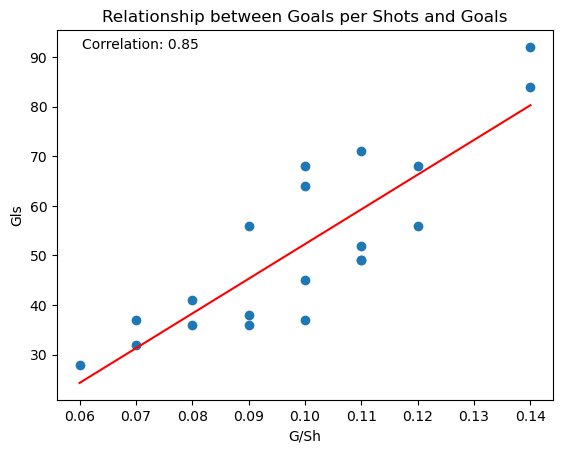

In [18]:
# Calculate line of best fit
slope, intercept, r_value, p_value, std_err = linregress(goals_SoT['G/Sh'], goals_SoT['Gls'])
line = slope * goals_SoT['G/Sh'] + intercept

# Plot scatter plot with line of best fit
plt.scatter(goals_SoT['G/Sh'], goals_SoT['Gls'])
plt.plot(goals_SoT['G/Sh'], line, color='red', label='Line of Best Fit')

# Add labels and title
plt.xlabel('G/Sh')
plt.ylabel('Gls')
plt.title('Relationship between Goals per Shots and Goals')

# Calculate Pearson correlation coefficient
correlation, _ = pearsonr(goals_SoT['G/Sh'], goals_SoT['Gls'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Correlation Analysis

In [19]:
shooting.head()

,Squad,Position,Gls#,Sh#,SoT#,xG#,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,2,2,5,5,5,84,589,194,32.9,15.50,5.11,0.14,0.42,3,71.9,69.1,0.12,12.1,11.9
1,Aston Villa,7,10,11,10,10,49,427,145,34.0,11.24,3.82,0.11,0.32,3,50.2,47.2,0.11,-1.2,-1.2
2,Bournemouth,15,15,20,18,18,37,358,126,35.2,9.42,3.32,0.10,0.29,0,38.6,38.6,0.11,-1.6,-1.6
3,Brentford,9,7,18,9,8,56,400,147,36.8,10.53,3.87,0.12,0.33,7,56.8,50.6,0.13,-0.8,-1.6
4,Brighton,6,4,1,1,2,68,607,219,36.1,15.97,5.76,0.10,0.28,6,73.3,68.9,0.12,-5.3,-6.9


In [20]:
corr_analysis = shooting[['Squad','Position', 'Gls#', 'Sh#', 'SoT#', 'xG#']].sort_values('Position').reset_index(drop=True)
corr_analysis.index = corr_analysis.index+1
corr_analysis

,Squad,Position,Gls#,Sh#,SoT#,xG#
1,Manchester City,1,1,3,3,1
2,Arsenal,2,2,5,5,5
3,Manchester Utd,3,8,4,2,6
4,Newcastle Utd,4,6,6,7,4
5,Liverpool,5,3,2,4,3
6,Brighton,6,4,1,1,2
7,Aston Villa,7,10,11,10,10
8,Tottenham,8,5,7,6,7
9,Brentford,9,7,18,9,8
10,Fulham,10,9,14,14,14


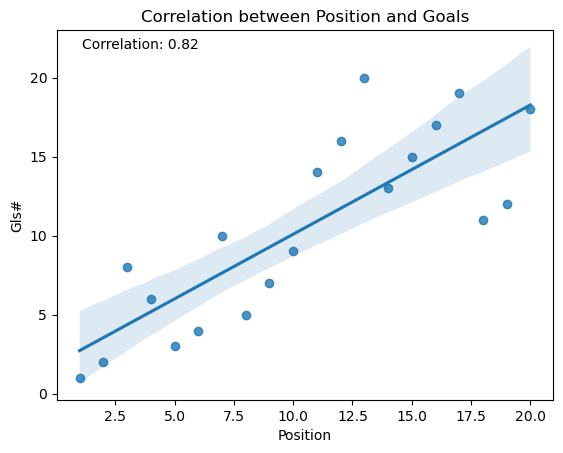

In [21]:
correlation = shooting['Position'].corr(shooting['Gls#'])

sns.regplot(x='Position', y='Gls#', data=shooting)

plt.xlabel('Position')
plt.ylabel('Gls#')
plt.title('Correlation between Position and Goals')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()


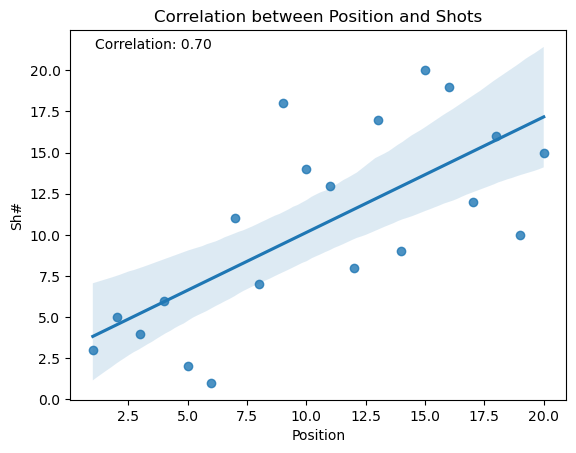

In [22]:
correlation = shooting['Position'].corr(shooting['Sh#'])

sns.regplot(x='Position', y='Sh#', data=shooting)

plt.xlabel('Position')
plt.ylabel('Sh#')
plt.title('Correlation between Position and Shots')

plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()

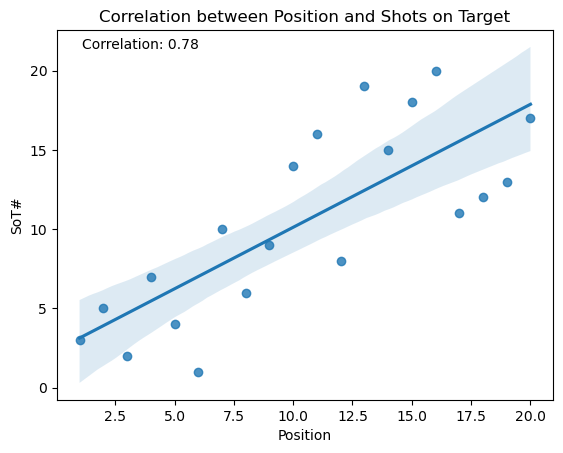

In [23]:
correlation = shooting['Position'].corr(shooting['SoT#'])

sns.regplot(x='Position', y='SoT#', data=shooting)

plt.xlabel('Position')
plt.ylabel('SoT#')
plt.title('Correlation between Position and Shots on Target')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()

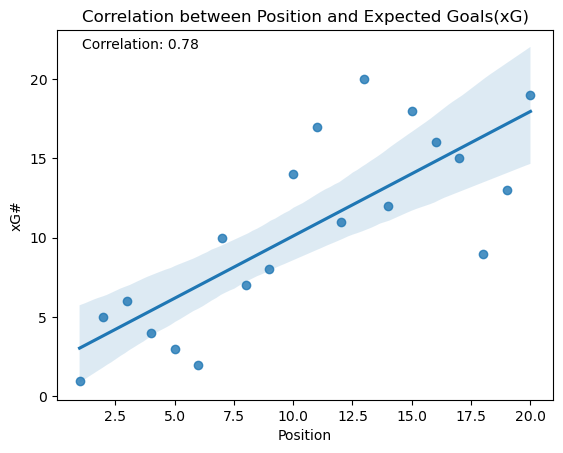

In [24]:
correlation = shooting['Position'].corr(shooting['xG#'])

sns.regplot(x='Position', y='xG#', data=shooting)

plt.xlabel('Position')
plt.ylabel('xG#')
plt.title('Correlation between Position and Expected Goals(xG)')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()

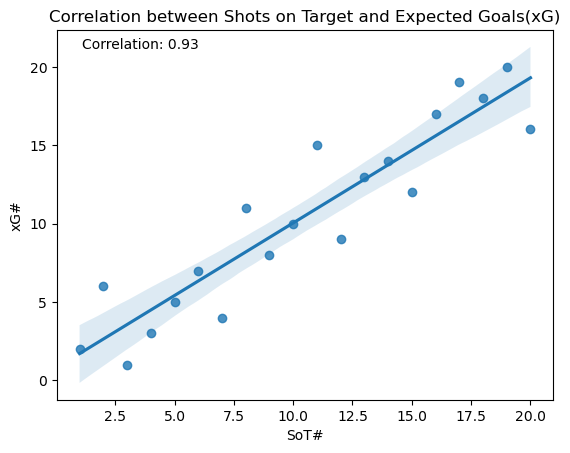

In [25]:
correlation = shooting['SoT#'].corr(shooting['xG#'])

sns.regplot(x='SoT#', y='xG#', data=shooting)

plt.xlabel('SoT#')
plt.ylabel('xG#')
plt.title('Correlation between Shots on Target and Expected Goals(xG)')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [26]:
corr_matrix = shooting[['Position', 'Gls#', 'Sh#', 'SoT#', 'xG#']].corr()

top_row = corr_matrix.iloc[0].drop('Position')

fig = px.bar(x=top_row.index, y=top_row.values, color=top_row.values, color_continuous_scale='Blues')

fig.update_layout(
    title='Correlation with Position',
    xaxis_title='Metrics',
    yaxis_title='Correlation',
    xaxis={'tickangle': 45, 'tickfont': {'size': 10}},
    yaxis={'tickfont': {'size': 10}},
    coloraxis_colorbar={'title': 'Correlation'},
    height=500,
    width=800
)

fig.show()
